# Principal Component Analysis (PCA)

### Importing Libraries And Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('Wine.csv')

In [3]:
data_set.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data_set.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
X = data_set.iloc[:, 0:13].values
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
y = data_set.iloc[:, -1].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Splititng Into Training And Testing Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
print(X_train, X_test, y_train, y_test)

[[1.341e+01 3.840e+00 2.120e+00 ... 9.100e-01 3.000e+00 1.035e+03]
 [1.339e+01 1.770e+00 2.620e+00 ... 9.200e-01 3.220e+00 1.195e+03]
 [1.161e+01 1.350e+00 2.700e+00 ... 9.600e-01 3.260e+00 6.800e+02]
 ...
 [1.208e+01 1.330e+00 2.300e+00 ... 1.070e+00 3.210e+00 6.250e+02]
 [1.419e+01 1.590e+00 2.480e+00 ... 1.230e+00 2.820e+00 1.680e+03]
 [1.247e+01 1.520e+00 2.200e+00 ... 1.160e+00 2.630e+00 9.370e+02]] [[1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
  2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
 [1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
  2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
 [1.260e+01 2.460e+00 2.200e+00 1.850e+01 9.400e+01 1.620e+00 6.600e-01
  6.300e-01 9.400e-01 7.100e+00 7.300e-01 1.580e+00 6.950e+02]
 [1.368e+01 1.830e+00 2.360e+00 1.720e+01 1.040e+02 

### Feature Scalling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

### Applying PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [12]:
explained_variance

array([0.4518698 , 0.19323708])

In [13]:
print(X_train, X_test)

[[ 0.81559819 -0.2143098 ]
 [ 1.87711191 -0.61750409]
 [ 1.58837898  1.42566342]
 [-1.76564506  0.92935999]
 [-3.45520912 -1.81880424]
 [-1.51484948  0.90206099]
 [-2.28568952 -0.2789961 ]
 [ 2.32291509  1.86574985]
 [-0.85428643  2.51513155]
 [-2.64158205 -0.37971528]
 [-2.320365   -2.51168482]
 [ 0.90443788  0.84122408]
 [ 2.82168385 -1.65702753]
 [ 2.61872356 -0.84093859]
 [-0.41402035  1.83431263]
 [ 0.25614602  2.41998003]
 [-1.68994492  1.06020446]
 [ 1.98443142 -1.48169361]
 [ 2.91884948 -0.65342495]
 [ 2.25761161 -1.11813211]
 [ 2.15515453 -1.00104974]
 [ 2.58060856 -1.21379491]
 [-2.10973363 -1.13035323]
 [-0.08774586  1.10782377]
 [-0.49109145  2.28589003]
 [-0.93571403 -3.50210413]
 [ 2.20425618  0.05253265]
 [-1.29995192  0.90874484]
 [-2.85152313 -0.28995995]
 [-2.49171062 -0.6117768 ]
 [ 0.12929427  1.17355405]
 [-2.76883855 -0.48966419]
 [ 2.62498945  0.1431136 ]
 [-2.24037337 -2.34985888]
 [-3.13610699  0.2787477 ]
 [-1.4090301   1.41978289]
 [-3.83141681 -0.67947983]
 

### Fitting Logistic Regression To Traing Data Set

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting

In [15]:
y_pred = classifier.predict(X_test)

### Making Confussion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  2 17]
 [ 0 15  0]
 [11  0  0]]


### Visualizing Training Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


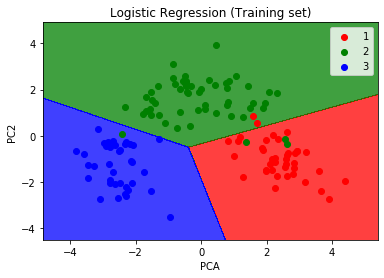

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualizing Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


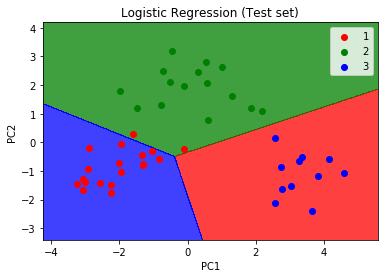

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# END